<h1>Baseline Wander Filter using DC Blocker</h1>

Removes wandering from signal using dc blocker filter.
<br> Used formula : y(n) = x(n) - x(n-1) + alpha*y(n-1)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [17]:
class dcBlockerFilter:
    rcParams['figure.figsize'] = 25.5,10.5

    def dc_blocker(self,signal,alpha):
        y = [None] * len(signal)
        delayed_x = 0
        delayed_y = 0
        for i in range(0,len(signal)):
            y[i] = signal[i] - delayed_x + alpha * delayed_y;
            delayed_x = signal[i]
            delayed_y = y[i]
        return y
    
    def extract_column(self,dataset,header_name):
        data = dataset[header_name]
        timestamp = dataset['timest']
        return data,timestamp
    
    def apply_filter(self,data,alpha):
        filtered_data = self.dc_blocker(data,alpha)
        return filtered_data
    
    def plot_data(self,filt_data,timestmp,label_y,label_x):
        plt.ylabel(label_y,fontsize=25)
        plt.xlabel(label_x,fontsize=25)
        plt.plot(timestmp,filt_data,c='r')

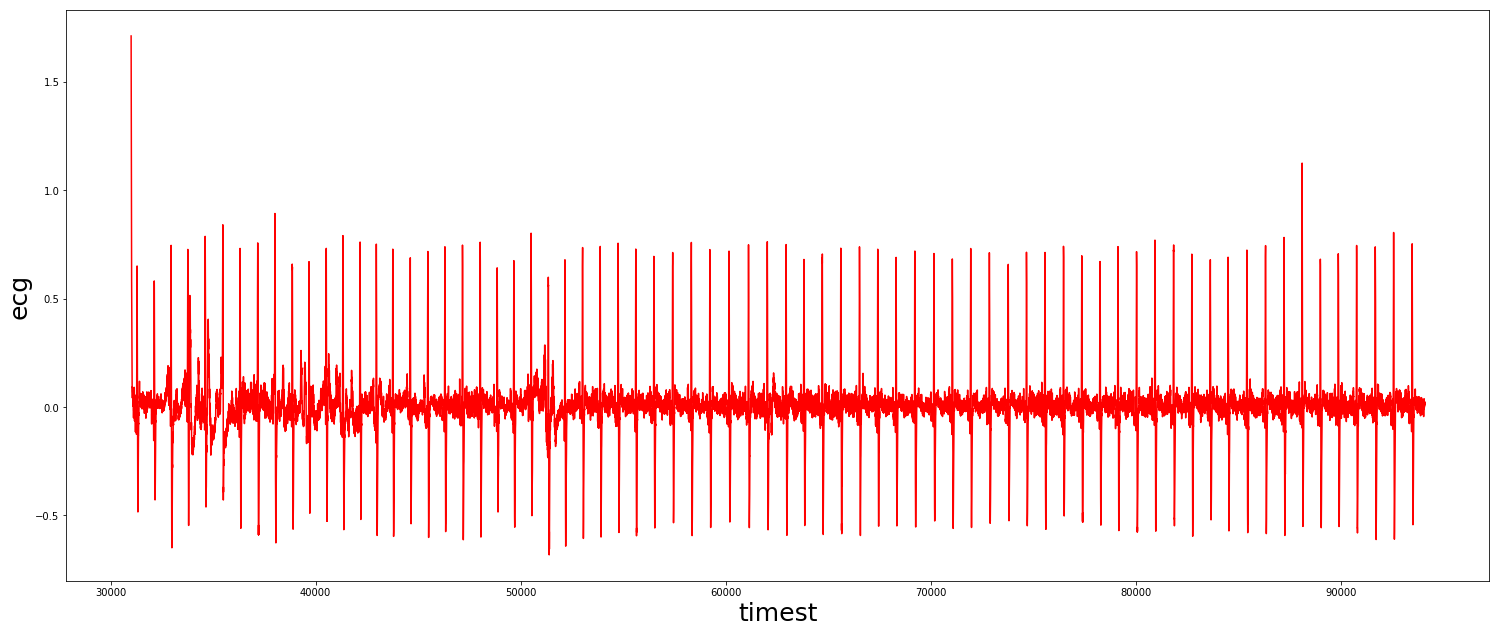

In [18]:
df = pd.read_csv('dataset1.csv')
df_list = np.array_split(df,6)
obj = dcBlockerFilter()

extracted_data, timestmp = obj.extract_column(df_list[0],'ecg')
filtered_data = obj.apply_filter(extracted_data,0.85)
obj.plot_data(filtered_data,timestmp,'ecg','timest')

<h2>Blue plot = Pre filter</h2>
<h2><br>Red plot = Post filter</h2>